## Portfolio Assignment week 04

This first week of the *supervised* part of machine learning is focused on the mathematical background of creating models. Therefore, during this exercise you are required to program the complete technique of *gradient descent* by hand. Later, we will off course just use [sklearn SGDRegressor](https://scikit-learn.org/stable/modules/sgd.html) for this.

Load the data for this exercise.(../Data/housing-data.txt). This is actually just random data, but for the sake of argument we will pretend it represents the prices of houses in Groningen as a function of their sizes. 

1. Load the data and create a scatter plot. As you will see, there seems to be a nice linear relationship between the size (on the horizontal axis) and the price (on the vertical axis).
As we have discussed, the general formula for the cost of a model is as follows:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} ( h_\theta(x^{(i)}) - y^{(i)} ) ^2 
$$


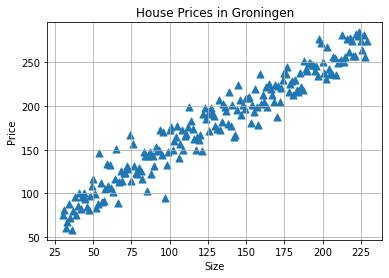

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("housing-data.txt")

# Create a scatter plot
plt.scatter(data['size'], data['price'], marker='^', s=50,cmap='warm')
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('House Prices in Groningen')
plt.grid(True)
plt.show()

2. Write a function `compute_cost` that receives a matrix `X` (of size $m \times n$), a vector `y` (of size $n \times 1$) and a vector `theta` (of size $n+1 \times 1$) and returns the total cost based on the formula above. For this to work correctly, you will need to add a column of 1's to the original `X`-matrix

When we call `compute-cost` with a value of `theta` of `[0,0]`, the total cost will probably be extremely high. In the next step, you need to update the values of this vector in order to minimize $J(\theta)$. 

As we have discussed, the technique we are using for this is *gradient descent*: every step of this descent, we update the values of `theta` as follows:

$$
\theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j
$$

In [5]:
# Define the compute_cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = np.dot(X, theta)
    squared_error = np.power(h - y, 2)
    J = 1 / (2 * m) * np.sum(squared_error)
    return J

# Test compute_cost function with theta = [0, 0]
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)
theta = np.zeros((X.shape[1], 1))
cost = compute_cost(X, y, theta)
print("Cost with theta [0, 0]:", cost)

Cost with theta [0, 0]: 17840.780961229346


3. Make a function `gradient_descent`, that receives the matrix `X`, the vectors `y` and `theta`, the learning curve `alpha` and a `num_iters`. In this method, performs `num_iters` steps of the gradient descent, calculating the cost $J(\theta)$ every step and storing that in a list. After the `num_iters`, this function needs to return the found value of `theta` and the list of all the costs.



In [6]:
# Define the gradient_descent function
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = []
    
    for i in range(num_iters):
        h = X.dot(theta)
        error = h - y
        gradient = X.T.dot(error) / m
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    
    return theta, cost_history

4. Create a plot of the values of $J(\theta)$ that `compute_costs` has found. Do you see a decrease in the total costs?

Final theta: [[1.14635763]]


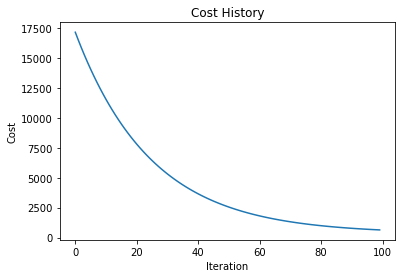

In [7]:
# Extract X and y from the data
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)

# Initialize theta as zeros
theta = np.zeros((X.shape[1], 1))

# Set learning rate and number of iterations
alpha = 1e-6
num_iters = 100

# Run gradient descent
theta_final, cost_history = gradient_descent(X, y, theta, alpha, num_iters)

# Print the final value of theta
print("Final theta:", theta_final)

# Plot the cost history
plt.plot(range(num_iters), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()